## Mo Balavar 

In [1]:
import pandas as pd
import numpy as np

xls = pd.ExcelFile("./dataset-phase2/Target4.2.xlsx")
df = pd.read_excel(xls, 'Data')
df_meta = pd.read_excel(xls, 'Country - Metadata')

In [2]:
#applying the required time-frmae which is 2006-2020

df=df.drop(df.columns[[4, 5, 21]], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    268 non-null    object 
 1   Series Code    266 non-null    object 
 2   Country Name   266 non-null    object 
 3   Country Code   266 non-null    object 
 4   2006 [YR2006]  170 non-null    float64
 5   2007 [YR2007]  180 non-null    float64
 6   2008 [YR2008]  179 non-null    float64
 7   2009 [YR2009]  174 non-null    float64
 8   2010 [YR2010]  181 non-null    float64
 9   2011 [YR2011]  196 non-null    float64
 10  2012 [YR2012]  190 non-null    float64
 11  2013 [YR2013]  196 non-null    float64
 12  2014 [YR2014]  207 non-null    float64
 13  2015 [YR2015]  206 non-null    float64
 14  2016 [YR2016]  203 non-null    float64
 15  2017 [YR2017]  194 non-null    float64
 16  2018 [YR2018]  196 non-null    float64
 17  2019 [YR2019]  186 non-null    float64
 18  2020 [YR20

In [3]:
#deleting rows with less than 4 values for different years
#so the max of null in a row can be 11(only from cloumn 4-18 which are value for different years) 

df_filtered=df[df.iloc[:, 4:19].isna().sum(axis=1)<12]
df_filtered.isna().sum(axis=1).max()
df_filtered.describe()

,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
count,169.000000,177.000000,178.000000,174.000000,179.000000,190.000000,189.000000,195.000000,201.000000,204.000000,202.000000,194.000000,193.000000,182.000000,125.000000
mean,53.407719,53.956158,54.262394,55.344440,55.617323,57.736794,59.644162,59.790153,62.990114,62.743816,63.554094,65.323969,64.902198,68.431328,62.715528
std,31.560445,32.485888,31.845397,32.133368,32.709828,33.233033,32.013599,31.858518,32.276331,32.519583,33.485002,33.317633,31.338913,30.292531,29.739306
min,1.688740,0.749830,1.041960,1.306930,1.261370,1.449840,1.436860,1.363670,3.940640,0.789420,0.956110,0.741850,1.085680,1.098480,6.372870
25%,27.850750,26.886900,24.658420,24.731488,25.585184,26.025618,29.659081,28.822281,33.722172,32.127866,33.984706,36.288218,38.021290,40.237224,35.514629
50%,51.699150,50.848339,52.125254,53.466228,54.518661,59.031361,62.534191,62.931900,67.240471,68.966503,67.827328,72.422546,69.689369,74.163425,62.428841
75%,81.086548,81.964012,81.619827,81.632713,82.475121,85.103676,86.129997,87.745087,90.285088,90.566490,90.190088,91.255667,90.961449,93.214874,84.237030
max,118.889847,135.918228,117.933060,118.418907,119.375229,126.925797,120.085121,118.835487,160.081345,157.822739,189.013443,205.895691,165.693604,166.160919,160.214386


In [4]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = MinMaxScaler(feature_range=(0, 100)).fit_transform(df_filtered.iloc[:,4:19])
df_scaled=pd.DataFrame(df_scaled)

df_labels=df_filtered.iloc[:,0:4]
df_labels.index=df_scaled.index
df_Target=pd.merge(df_labels, df_scaled, left_index=True, right_index=True)
df_Target.columns=df.columns
df_Target.head()

,Series Name,Series Code,Country Name,Country Code,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,"School enrollment, preprimary (% gross)",SE.PRE.ENRR,Albania,ALB,44.436442,40.015885,49.248915,51.584237,53.996357,54.634741,63.962186,68.267159,50.857598,54.529085,46.116870,40.495578,48.243761,45.229254,44.700101
1,"School enrollment, preprimary (% gross)",SE.PRE.ENRR,Algeria,DZA,23.332929,21.712937,30.128317,67.444670,69.991357,61.863770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"School enrollment, preprimary (% gross)",SE.PRE.ENRR,Angola,AGO,NaN,100.000000,84.161940,78.068229,71.605569,57.285190,NaN,NaN,NaN,NaN,20.554853,NaN,NaN,NaN,NaN
3,"School enrollment, preprimary (% gross)",SE.PRE.ENRR,Antigua and Barbuda,ATG,NaN,60.647899,71.636542,NaN,78.259242,72.193025,79.585872,78.474893,56.875172,NaN,39.296969,35.052822,42.019801,NaN,NaN
4,"School enrollment, preprimary (% gross)",SE.PRE.ENRR,Argentina,ARG,52.889695,47.265335,56.088995,56.991703,57.259056,53.734762,58.283866,60.342901,44.388527,47.062459,39.549153,36.725065,46.240502,46.455361,NaN


# Imputig data

Imputaion is being done with five different methods and each dataset labeled based on the method that has been used for comparison purposes. The five methods are as follow (in order): mean, median, forward fill, backard fill and linear regression

In [5]:
#Transpose the table so for imputation methods we are using the data from same country for different years
df_target=df_Target.T

df_meta = pd.read_excel(xls, 'Country - Metadata')
df_meta=df_meta.iloc[:,[0,2]]
df_meta.rename(columns = {'Code':'Country Code'}, inplace = True)


#df_target = df_target.join(df_meta, how='left',on='Country Code')



df_target.head()

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
Series Name,"School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)",...,"School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)","School enrollment, preprimary (% gross)"
Series Code,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,...,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR,SE.PRE.ENRR
Country Name,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,...,Post-demographic dividend,Pre-demographic dividend,Small states,South Asia,South Asia (IDA & IBRD),Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Sub-Saharan Africa (IDA & IBRD countries),Upper middle income,World
Country Code,ALB,DZA,AGO,ATG,ARG,ARM,ABW,AUS,AUT,AZE,...,PST,PRE,SST,SAS,TSA,SSF,SSA,TSS,UMC,WLD
2006 [YR2006],44.436442,23.332929,NaN,NaN,52.889695,NaN,91.545754,69.270397,75.282668,21.381599,...,67.555323,17.318018,32.98614,24.539325,24.539325,16.733792,16.730696,16.733792,39.069819,32.30867


### Imputing with Mean

In [6]:
df_mean=df_target.iloc[4:19, :].fillna(df_target.iloc[4:19, :].mean())

df_mean.columns=df_target.iloc[3,:]
print(df_mean.shape)
df_mean.head()

(15, 223)


Country Code,ALB,DZA,AGO,ATG,ARG,ARM,ABW,AUS,AUT,AZE,...,PST,PRE,SST,SAS,TSA,SSF,SSA,TSS,UMC,WLD
2006 [YR2006],44.436442,23.332929,68.612630,61.404224,52.889695,21.693792,91.545754,69.270397,75.282668,21.381599,...,67.555323,17.318018,32.986140,24.539325,24.539325,16.733792,16.730696,16.733792,39.069819,32.308670
2007 [YR2007],40.015885,21.712937,100.000000,60.647899,47.265335,21.693792,78.849659,59.958440,66.904122,18.722764,...,59.183469,14.146280,29.612315,24.213692,24.213694,14.131410,14.128657,14.131410,35.953398,29.758752
2008 [YR2008],49.248915,30.128317,84.161940,71.636542,56.088995,21.693792,86.086795,68.939643,79.439181,19.777203,...,68.363759,15.533364,35.256405,30.315687,30.315686,15.933573,15.930357,15.933573,43.210860,35.555308
2009 [YR2009],51.584237,67.444670,78.068229,61.404224,56.991703,21.693792,85.004118,68.342326,81.871259,18.976744,...,67.965143,16.203347,35.871038,31.746241,31.746241,16.839960,16.836860,16.839960,44.533890,36.618645
2010 [YR2010],53.996357,69.991357,71.605569,78.259242,57.259056,21.693792,87.308651,65.434481,84.213844,20.591630,...,68.583792,16.272467,35.750234,34.209136,34.209135,16.818000,16.814971,16.818000,46.963659,38.081315


### Imputing with Median

In [7]:
df_median=df_target.iloc[4:19, :].fillna(df_target.iloc[4:19, :].median())

df_median.columns=df_target.iloc[3,:]
print(df_median.shape)
df_median.head(10)

(15, 223)


Country Code,ALB,DZA,AGO,ATG,ARG,ARM,ABW,AUS,AUT,AZE,...,PST,PRE,SST,SAS,TSA,SSF,SSA,TSS,UMC,WLD
2006 [YR2006],44.436442,23.332929,74.836899,66.142221,52.889695,22.570808,91.545754,69.270397,75.282668,21.381599,...,67.555323,17.318018,32.986140,24.539325,24.539325,16.733792,16.730696,16.733792,39.069819,32.308670
2007 [YR2007],40.015885,21.712937,100.000000,60.647899,47.265335,22.570808,78.849659,59.958440,66.904122,18.722764,...,59.183469,14.146280,29.612315,24.213692,24.213694,14.131410,14.128657,14.131410,35.953398,29.758752
2008 [YR2008],49.248915,30.128317,84.161940,71.636542,56.088995,22.570808,86.086795,68.939643,79.439181,19.777203,...,68.363759,15.533364,35.256405,30.315687,30.315686,15.933573,15.930357,15.933573,43.210860,35.555308
2009 [YR2009],51.584237,67.444670,78.068229,66.142221,56.991703,22.570808,85.004118,68.342326,81.871259,18.976744,...,67.965143,16.203347,35.871038,31.746241,31.746241,16.839960,16.836860,16.839960,44.533890,36.618645
2010 [YR2010],53.996357,69.991357,71.605569,78.259242,57.259056,22.570808,87.308651,65.434481,84.213844,20.591630,...,68.583792,16.272467,35.750234,34.209136,34.209135,16.818000,16.814971,16.818000,46.963659,38.081315
2011 [YR2011],54.634741,61.863770,57.285190,72.193025,53.734762,22.570808,80.237985,74.685318,79.189943,20.010064,...,65.628494,16.951247,34.396925,34.883934,34.883935,17.155016,17.152346,17.155016,47.144474,37.908712
2012 [YR2012],63.962186,45.996044,74.836899,79.585872,58.283866,22.570808,88.569771,89.473487,86.104087,19.732671,...,70.485385,19.712020,36.080816,38.604316,38.604318,20.926502,20.923787,20.926502,54.087779,42.725910
2013 [YR2013],68.267159,45.996044,74.836899,78.474893,60.342901,22.570808,88.509856,91.508070,84.126396,20.747836,...,71.649357,22.144834,36.702224,41.420199,41.420198,23.374637,23.372167,23.374637,55.607762,44.858198
2014 [YR2014],50.857598,45.996044,74.836899,56.875172,44.388527,22.570808,65.233069,70.247401,62.173922,12.274121,...,50.860935,10.497878,26.111443,30.590979,30.590978,12.629993,12.627976,12.629993,41.731473,32.152219
2015 [YR2015],54.529085,45.996044,74.836899,66.142221,47.062459,22.703079,65.420154,78.605172,64.790061,14.701574,...,54.413337,13.301337,28.664776,33.982228,33.982228,15.763483,15.761610,15.763483,44.591084,35.226021


### Imputing with Forward Fill

In [8]:
df_ffill=df_target.iloc[4:19, :].ffill(axis=0)

df_ffill.columns=df_target.iloc[3,:]

#Filling NaN values with zero
df_ffill=df_ffill.fillna(0)
print(df_ffill.shape)
df_ffill.head()

(15, 223)


Country Code,ALB,DZA,AGO,ATG,ARG,ARM,ABW,AUS,AUT,AZE,...,PST,PRE,SST,SAS,TSA,SSF,SSA,TSS,UMC,WLD
2006 [YR2006],44.436442,23.332929,0.000000,0.000000,52.889695,0.0,91.545754,69.270397,75.282668,21.381599,...,67.555323,17.318018,32.986140,24.539325,24.539325,16.733792,16.730696,16.733792,39.069819,32.308670
2007 [YR2007],40.015885,21.712937,100.000000,60.647899,47.265335,0.0,78.849659,59.958440,66.904122,18.722764,...,59.183469,14.146280,29.612315,24.213692,24.213694,14.131410,14.128657,14.131410,35.953398,29.758752
2008 [YR2008],49.248915,30.128317,84.161940,71.636542,56.088995,0.0,86.086795,68.939643,79.439181,19.777203,...,68.363759,15.533364,35.256405,30.315687,30.315686,15.933573,15.930357,15.933573,43.210860,35.555308
2009 [YR2009],51.584237,67.444670,78.068229,71.636542,56.991703,0.0,85.004118,68.342326,81.871259,18.976744,...,67.965143,16.203347,35.871038,31.746241,31.746241,16.839960,16.836860,16.839960,44.533890,36.618645
2010 [YR2010],53.996357,69.991357,71.605569,78.259242,57.259056,0.0,87.308651,65.434481,84.213844,20.591630,...,68.583792,16.272467,35.750234,34.209136,34.209135,16.818000,16.814971,16.818000,46.963659,38.081315


### Imputing with Backward Fill

In [9]:
df_bfill=df_target.iloc[4:19, :].bfill(axis=0)

df_bfill.columns=df_target.iloc[3,:]

#Filling NaN values with zero
df_bfill=df_bfill.fillna(0)

print(df_bfill.shape)
df_bfill.head()

(15, 223)


Country Code,ALB,DZA,AGO,ATG,ARG,ARM,ABW,AUS,AUT,AZE,...,PST,PRE,SST,SAS,TSA,SSF,SSA,TSS,UMC,WLD
2006 [YR2006],44.436442,23.332929,100.000000,60.647899,52.889695,22.703079,91.545754,69.270397,75.282668,21.381599,...,67.555323,17.318018,32.986140,24.539325,24.539325,16.733792,16.730696,16.733792,39.069819,32.308670
2007 [YR2007],40.015885,21.712937,100.000000,60.647899,47.265335,22.703079,78.849659,59.958440,66.904122,18.722764,...,59.183469,14.146280,29.612315,24.213692,24.213694,14.131410,14.128657,14.131410,35.953398,29.758752
2008 [YR2008],49.248915,30.128317,84.161940,71.636542,56.088995,22.703079,86.086795,68.939643,79.439181,19.777203,...,68.363759,15.533364,35.256405,30.315687,30.315686,15.933573,15.930357,15.933573,43.210860,35.555308
2009 [YR2009],51.584237,67.444670,78.068229,78.259242,56.991703,22.703079,85.004118,68.342326,81.871259,18.976744,...,67.965143,16.203347,35.871038,31.746241,31.746241,16.839960,16.836860,16.839960,44.533890,36.618645
2010 [YR2010],53.996357,69.991357,71.605569,78.259242,57.259056,22.703079,87.308651,65.434481,84.213844,20.591630,...,68.583792,16.272467,35.750234,34.209136,34.209135,16.818000,16.814971,16.818000,46.963659,38.081315


### Imputing with  Regression

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


impute_it = IterativeImputer(max_iter=1000)
impute_it.fit_transform(df_target.iloc[4:19, :])
X1=impute_it.fit_transform(df_target.iloc[4:19, :])
df_regr=pd.DataFrame(X1)
df_regr.columns=df_target.iloc[3,:]

print(df_regr.shape)
df_regr.head()

(15, 223)


Country Code,ALB,DZA,AGO,ATG,ARG,ARM,ABW,AUS,AUT,AZE,...,PST,PRE,SST,SAS,TSA,SSF,SSA,TSS,UMC,WLD
0,44.436442,23.332929,110.731754,69.476146,52.889695,27.046194,91.545754,69.270397,75.282668,21.381599,...,67.555323,17.318018,32.986140,24.539325,24.539325,16.733792,16.730696,16.733792,39.069819,32.308670
1,40.015885,21.712937,100.000000,60.647899,47.265335,23.784427,78.849659,59.958440,66.904122,18.722764,...,59.183469,14.146280,29.612315,24.213692,24.213694,14.131410,14.128657,14.131410,35.953398,29.758752
2,49.248915,30.128317,84.161940,71.636542,56.088995,28.133877,86.086795,68.939643,79.439181,19.777203,...,68.363759,15.533364,35.256405,30.315687,30.315686,15.933573,15.930357,15.933573,43.210860,35.555308
3,51.584237,67.444670,78.068229,76.493970,56.991703,28.081196,85.004118,68.342326,81.871259,18.976744,...,67.965143,16.203347,35.871038,31.746241,31.746241,16.839960,16.836860,16.839960,44.533890,36.618645
4,53.996357,69.991357,71.605569,78.259242,57.259056,27.742393,87.308651,65.434481,84.213844,20.591630,...,68.583792,16.272467,35.750234,34.209136,34.209135,16.818000,16.814971,16.818000,46.963659,38.081315


In [11]:
#Transpose the dataset one more time to cluster based on datapoints which are countries

df_mean=df_mean.T
df_median=df_median.T
df_ffill=df_ffill.T
df_bfill=df_bfill.T
df_regr=df_regr.T

# Clustering

We used the elbow method to identify the most suitable number of clusters for our dataset. To ensure that the imputation method won't affect the number of clusters, the elbow method has been applied to two different imputed datasets. The first plot shows the df_mean, and the second plot shows the df_regr. As soon as n=4, the graph becomes pretty horizontal, so four clusters is our answer.

env: OMP_NUM_THREADS=1


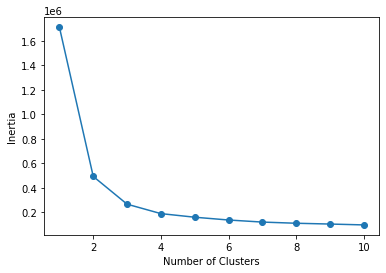

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%env OMP_NUM_THREADS=1
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(df_mean.iloc[:,1:16])
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
plt.show()

env: OMP_NUM_THREADS=1


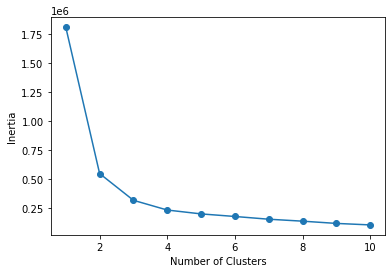

In [13]:
%env OMP_NUM_THREADS=1
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(df_regr.iloc[:,1:16])
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
plt.show()

### Clustering usin KMEAN method

In [14]:
from sklearn.cluster import KMeans
#applying Kmeans for df_mean



model_mean= KMeans(n_clusters=4)
model_mean.fit(df_mean.iloc[:,1:16])


#to see labels for each point
Klabels_mean=model_mean.labels_

In [15]:
#applying Kmeans for df_median


model_median= KMeans(n_clusters=4)
model_median.fit(df_median.iloc[:,1:16])


#to see labels for each point
Klabels_median=model_median.labels_

In [16]:
#applying Kmeans for df_ffill


model_ffill= KMeans(n_clusters=4)
model_ffill.fit(df_ffill.iloc[:,1:16])


#to see labels for each point
Klabels_ffill=model_ffill.labels_

In [17]:
#applying Kmeans for df_bfill


model_bfill= KMeans(n_clusters=4)
model_bfill.fit(df_bfill.iloc[:,1:16])


#to see labels for each point
Klabels_bfill=model_bfill.labels_

In [18]:
#applying Kmeans for df_regr


model_regr= KMeans(n_clusters=4)
model_regr.fit(df_regr.iloc[:,1:16])


#to see labels for each point
Klabels_regr=model_regr.labels_

### Clustering usin Hierarchical method

In [19]:
from sklearn.cluster import AgglomerativeClustering

#applying Hierarchical for df_mean

cluster_mean = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  

cluster_mean.fit_predict(df_mean.iloc[:,1:16])

Hlabels_mean=cluster_mean.labels_

In [20]:
#applying Hierarchical for df_median

cluster_median = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  

cluster_median.fit_predict(df_median.iloc[:,1:16])

Hlabels_median=cluster_median.labels_

In [21]:
#applying Hierarchical for df_ffill

cluster_ffill = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  

cluster_ffill.fit_predict(df_ffill.iloc[:,1:16])

Hlabels_ffill=cluster_ffill.labels_

In [22]:
#applying Hierarchical for df_bfill

cluster_bfill = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  

cluster_bfill.fit_predict(df_bfill.iloc[:,1:16])

Hlabels_bfill=cluster_bfill.labels_


In [23]:
#applying Hierarchical for df_regr

cluster_regr = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  

cluster_regr.fit_predict(df_regr.iloc[:,1:16])

Hlabels_regr=cluster_regr.labels_



In [24]:
df_mean

,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
Country Code,,,,,,,,,,,,,,,
ALB,44.436442,40.015885,49.248915,51.584237,53.996357,54.634741,63.962186,68.267159,50.857598,54.529085,46.116870,40.495578,48.243761,45.229254,44.700101
DZA,23.332929,21.712937,30.128317,67.444670,69.991357,61.863770,45.745663,45.745663,45.745663,45.745663,45.745663,45.745663,45.745663,45.745663,45.745663
AGO,68.612630,100.000000,84.161940,78.068229,71.605569,57.285190,68.612630,68.612630,68.612630,68.612630,20.554853,68.612630,68.612630,68.612630,68.612630
ATG,61.404224,60.647899,71.636542,61.404224,78.259242,72.193025,79.585872,78.474893,56.875172,61.404224,39.296969,35.052822,42.019801,61.404224,61.404224
ARG,52.889695,47.265335,56.088995,56.991703,57.259056,53.734762,58.283866,60.342901,44.388527,47.062459,39.549153,36.725065,46.240502,46.455361,50.234099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SSF,16.733792,14.131410,15.933573,16.839960,16.818000,17.155016,20.926502,23.374637,12.629993,15.763483,13.681961,12.894586,15.814755,15.912803,14.068147
SSA,16.730696,14.128657,15.930357,16.836860,16.814971,17.152346,20.923787,23.372167,12.627976,15.761610,13.680402,12.893193,15.813066,15.911155,14.066353
TSS,16.733792,14.131410,15.933573,16.839960,16.818000,17.155016,20.926502,23.374637,12.629993,15.763483,13.681961,12.894586,15.814755,15.912803,14.068147


### Clustering usin Birch method

In [25]:
from sklearn.cluster import Birch

# Fit the Birch model for clustering the de_mean
mean_birch= Birch( n_clusters = 4)
mean_birch.fit_predict(df_mean)
Blabels_mean=mean_birch.labels_

In [26]:
# Fit the Birch model for clustering the df_median
median_birch= Birch( n_clusters = 4)
median_birch.fit_predict(df_median)
Blabels_median=median_birch.labels_

In [27]:
# Fit the Birch model for clustering the df_ffill
ffill_birch= Birch( n_clusters = 4)
ffill_birch.fit_predict(df_ffill)
Blabels_ffill=ffill_birch.labels_

In [28]:
# Fit the Birch model for clustering the df_bfill
bfill_birch= Birch( n_clusters = 4)
bfill_birch.fit_predict(df_bfill)
Blabels_bfill=bfill_birch.labels_

In [29]:
# Fit the Birch model for clustering the df_regr
regr_birch= Birch( n_clusters = 4)
regr_birch.fit_predict(df_regr)
Blabels_regr=regr_birch.labels_

### Evaluate the performance of clustering for KMEAN method



#add the true lable for each country which is extracted from df_meta['Income Group'], to datasets
df_mean = pd.merge(df_mean, df_meta,  on='Country Code', suffixes=( None,None))
df_median = pd.merge(df_median, df_meta,  on='Country Code', suffixes=( None,None))
df_ffill = pd.merge(df_ffill, df_meta,  on='Country Code', suffixes=( None, None))
df_bfill = pd.merge(df_bfill, df_meta,  on='Country Code', suffixes=( None, None))
df_regr = pd.merge(df_regr, df_meta,  on='Country Code', suffixes=( None, None))

#### Using a method without using true labels
The selected method in the following box is Silhouette Coefficient which does not need the actual lables for compariosn. Using an Internal method without using actual lables.

In [30]:
from sklearn import metrics
#comparing Silhouette Coefficient for KMEAN
print(
    "Silhouette Coefficient for K=4 using df_mean: %0.3f"
    % metrics.silhouette_score(df_mean, Klabels_mean, metric='euclidean')
)
print(
    "Silhouette Coefficient for K=4 using df_median: %0.3f"
    % metrics.silhouette_score(df_median, Klabels_median, metric='euclidean')
)
print(
    "Silhouette Coefficient for K=4 using df_ffill: %0.3f"
    % metrics.silhouette_score(df_ffill, Klabels_ffill, metric='euclidean')
)
print(
    "Silhouette Coefficient for K=4 using df_bfill: %0.3f"
    % metrics.silhouette_score(df_bfill, Klabels_bfill, metric='euclidean')
)
print(
     "Silhouette Coefficient for K=4 using df_regr: %0.3f"
    % metrics.silhouette_score(df_regr, Klabels_regr, metric='euclidean')
)

Silhouette Coefficient for K=4 using df_mean: 0.451
Silhouette Coefficient for K=4 using df_median: 0.446
Silhouette Coefficient for K=4 using df_ffill: 0.474
Silhouette Coefficient for K=4 using df_bfill: 0.373
Silhouette Coefficient for K=4 using df_regr: 0.454


#### Using a method with using true labels
In the following box the homogeneity, completeness and V-measure is calculated with comparisonn between true labels and predicted labels.
The true lables for each dataset is defined seperately as the imputation and peprocesing caused in dropping some rows or columns(specially in df_ffill and df_bfill)

In [31]:
y_mean=df_mean.index
print(
     "Homogeneity, completeness and V-measure for K=4 using df_mean with KMEAN clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_mean, Klabels_mean))

y_median=df_median.index
print(
     "Homogeneity, completeness and V-measure for K=4 using df_median with KMEAN clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_median, Klabels_median))

y_ffill=df_ffill.index
print(
     "Homogeneity, completeness and V-measure for K=4 using df_ffill with KMEAN clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_ffill, Klabels_ffill))

y_bfill=df_bfill.index
print(
     "Homogeneity, completeness and V-measure for K=4 using df_bfill with KMEAN clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_bfill, Klabels_bfill))

y_regr=df_regr.index
print(
     "Homogeneity, completeness and V-measure for K=4 using df_regr with KMEAN clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_regr, Klabels_regr))

Homogeneity, completeness and V-measure for K=4 using df_mean with KMEAN clustering: 0.255, 1.000, 0.406 
Homogeneity, completeness and V-measure for K=4 using df_median with KMEAN clustering: 0.255, 1.000, 0.407 
Homogeneity, completeness and V-measure for K=4 using df_ffill with KMEAN clustering: 0.234, 1.000, 0.379 
Homogeneity, completeness and V-measure for K=4 using df_bfill with KMEAN clustering: 0.255, 1.000, 0.407 
Homogeneity, completeness and V-measure for K=4 using df_regr with KMEAN clustering: 0.253, 1.000, 0.404 


### Evaluate the performance of clustering for Hierarchical method



#### Using a method without using true labels
The selected method in the following box is Silhouette Coefficient which does not need the actual lables for compariosn. Using an Internal method without using actual lables.

In [32]:
#comparing Silhouette Coefficient for Hierarchical
print(
    "Silhouette Coefficient for K=4 using df_mean: %0.3f"
    % metrics.silhouette_score(df_mean, Hlabels_mean, metric='euclidean')
)
print(
    "Silhouette Coefficient for K=4 using df_median: %0.3f"
    % metrics.silhouette_score(df_median, Hlabels_median, metric='euclidean')
)
print(
    "Silhouette Coefficient for K=4 using df_ffill: %0.3f"
    % metrics.silhouette_score(df_ffill, Hlabels_ffill, metric='euclidean')
)
print(
    "Silhouette Coefficient for K=4 using df_bfill: %0.3f"
    % metrics.silhouette_score(df_bfill, Hlabels_bfill, metric='euclidean')
)
print(
     "Silhouette Coefficient for K=4 using df_regr: %0.3f"
    % metrics.silhouette_score(df_regr, Hlabels_regr, metric='euclidean')
)

Silhouette Coefficient for K=4 using df_mean: 0.437
Silhouette Coefficient for K=4 using df_median: 0.450
Silhouette Coefficient for K=4 using df_ffill: 0.430
Silhouette Coefficient for K=4 using df_bfill: 0.365
Silhouette Coefficient for K=4 using df_regr: 0.447


#### Using a method with using true labels
In the following box the homogeneity, completeness and V-measure is calculated with comparisonn between true labels and predicted labels.


In [33]:

print(
     "Homogeneity, completeness and V-measure for n=4 using df_mean with Hierarchical clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_mean, Hlabels_mean))


print(
     "Homogeneity, completeness and V-measure for n=4 using df_median with Hierarchical clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_median, Hlabels_median))


print(
     "Homogeneity, completeness and V-measure for n=4 using df_ffill with Hierarchical clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_ffill, Hlabels_ffill))


print(
     "Homogeneity, completeness and V-measure for n=4 using df_bfill with Hierarchical clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_bfill, Hlabels_bfill))


print(
     "Homogeneity, completeness and V-measure for n=4 using df_regr with Hierarchical clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_regr, Hlabels_regr))

Homogeneity, completeness and V-measure for n=4 using df_mean with Hierarchical clustering: 0.249, 1.000, 0.398 
Homogeneity, completeness and V-measure for n=4 using df_median with Hierarchical clustering: 0.233, 1.000, 0.378 
Homogeneity, completeness and V-measure for n=4 using df_ffill with Hierarchical clustering: 0.225, 1.000, 0.367 
Homogeneity, completeness and V-measure for n=4 using df_bfill with Hierarchical clustering: 0.192, 1.000, 0.322 
Homogeneity, completeness and V-measure for n=4 using df_regr with Hierarchical clustering: 0.193, 1.000, 0.324 


### Evaluate the performance of clustering for Birch method

#### Using a method without using true labels
The selected method in the following box is Silhouette Coefficient which does not need the actual lables for compariosn. Using an Internal method without using actual lables.

In [34]:
from sklearn import metrics
#comparing Silhouette Coefficient for Birch
print(
    "Silhouette Coefficient for K=4 using df_mean: %0.3f"
    % metrics.silhouette_score(df_mean, Blabels_mean, metric='euclidean')
)
print(
    "Silhouette Coefficient for K=4 using df_median: %0.3f"
    % metrics.silhouette_score(df_median, Blabels_median, metric='euclidean')
)
print(
    "Silhouette Coefficient for K=4 using df_ffill: %0.3f"
    % metrics.silhouette_score(df_ffill, Blabels_ffill, metric='euclidean')
)
print(
    "Silhouette Coefficient for K=4 using df_bfill: %0.3f"
    % metrics.silhouette_score(df_bfill, Blabels_bfill, metric='euclidean')
)
print(
     "Silhouette Coefficient for K=4 using df_regr: %0.3f"
    % metrics.silhouette_score(df_regr, Blabels_regr, metric='euclidean')
)

Silhouette Coefficient for K=4 using df_mean: 0.421
Silhouette Coefficient for K=4 using df_median: 0.430
Silhouette Coefficient for K=4 using df_ffill: 0.469
Silhouette Coefficient for K=4 using df_bfill: 0.354
Silhouette Coefficient for K=4 using df_regr: 0.412


#### Using a method with using true labels
In the following box the homogeneity, completeness and V-measure is calculated with comparisonn between true labels and predicted labels.


In [35]:

print(
     "Homogeneity, completeness and V-measure for n=4 using df_mean with Birch clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_mean, Blabels_mean))


print(
     "Homogeneity, completeness and V-measure for n=4 using df_median with Birch clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_median, Blabels_median))


print(
     "Homogeneity, completeness and V-measure for n=4 using df_ffill with Birch clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_ffill, Blabels_ffill))


print(
     "Homogeneity, completeness and V-measure for n=4 using df_bfill with Birch clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_bfill, Blabels_bfill))


print(
     "Homogeneity, completeness and V-measure for n=4 using df_regr with Birch clustering: %0.3f, %0.3f, %0.3f "
   %metrics.homogeneity_completeness_v_measure(y_regr, Blabels_regr))

Homogeneity, completeness and V-measure for n=4 using df_mean with Birch clustering: 0.249, 1.000, 0.398 
Homogeneity, completeness and V-measure for n=4 using df_median with Birch clustering: 0.245, 1.000, 0.394 
Homogeneity, completeness and V-measure for n=4 using df_ffill with Birch clustering: 0.230, 1.000, 0.374 
Homogeneity, completeness and V-measure for n=4 using df_bfill with Birch clustering: 0.253, 1.000, 0.404 
Homogeneity, completeness and V-measure for n=4 using df_regr with Birch clustering: 0.247, 1.000, 0.396 


#### Visual componenets
In the following graphs clustering related to  different methods has been plotted. Using df_mean for all graphs as source dataset

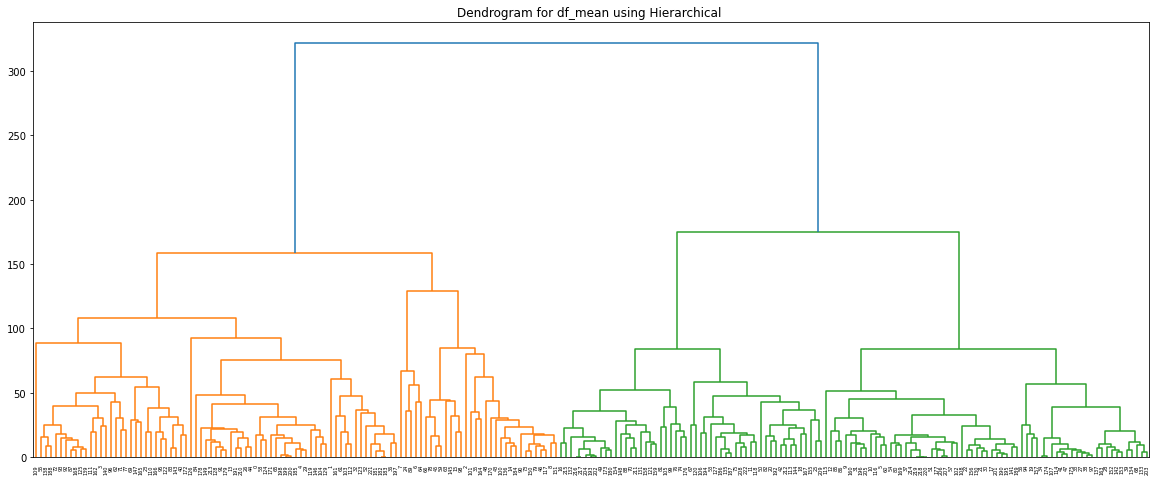

In [36]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 8))  
plt.title("Dendrogram for df_mean using Hierarchical ")  
dend = shc.dendrogram(shc.linkage(df_mean.iloc[:,1:16], method='complete'))

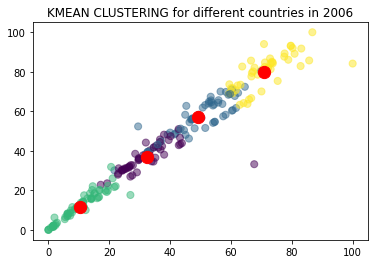

In [37]:
import matplotlib.pyplot as plt
#following graph shows the distrubution for 2006 in our df_mean dataset
plt.title("KMEAN CLUSTERING for different countries in 2006")
centroids = model_mean.cluster_centers_

plt.scatter(df_mean.iloc[:,1], df_mean.iloc[:,2], c= model_mean.labels_, s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=150)

plt.show()

The Birch method and Kmean have more homogeneity than Hierarchical based on the different values for clustering performance. The ffill and bfill methods also perform better with the selected dataset (4.2 Target File). Since the data set is time series data, it makes sense that time and trend will affect the values. In the end, I think the Bfill method is most appropriate because there are more data collected for recent years and a more logical trend can most likely be predicted.